In [1]:
%store -r __importData
import pandas as pd
import numpy as np
import ggplot as gplt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import time

C:\Users\S\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\S\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\S\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [41]:
__importData

import group_table


C:\Users\S\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


import airline_table


C:\Users\S\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


import order_table
import train_set
import test_set


In [42]:
group_table["begin_date"] = pd.to_datetime(group_table["begin_date"])
group_table["begin_year"] = group_table["begin_date"].dt.year
group_table["begin_month"] = group_table["begin_date"].dt.month
gb = group_table.groupby(["begin_year", "begin_month"])
gb = gb.group_id.count().reset_index()
gb.rename({"group_id": "same_month_group_count"}, axis="columns", inplace=True)
same_month_sum = gb.groupby("begin_year")["same_month_group_count"].sum().reset_index()
same_month_sum.rename({"same_month_group_count": "same_month_sum"}, axis="columns", inplace=True)
gb = pd.merge(gb, same_month_sum, on="begin_year", how="left")
gb["same_month_group_ratio"] = gb["same_month_group_count"] / gb["same_month_sum"]
group_table = pd.merge(group_table, gb, on=["begin_year", "begin_month"], how="left")

In [49]:
group_table[["group_id", "same_month_group_ratio"]].to_csv("same_month_group_ratio.csv", encoding="utf-8", index=False)

In [43]:
train_set = pd.merge(train_set, order_table, on="order_id", how="left")
train_set = pd.merge(train_set, group_table, on="group_id", how="left")
#train_set = pd.merge(train_set, airline_table, on="group_id", how="left")

test_set = pd.merge(test_set, order_table, on="order_id", how="left")
test_set = pd.merge(test_set, group_table, on="group_id", how="left")
#test_set = pd.merge(test_set, airline_table, on="group_id", how="left")
main_table = pd.concat([train_set, test_set])
main_table.index = list(range(main_table.shape[0]))
"""main_table = pd.merge(train_set, order_table, on="order_id", how="left")
main_table = pd.merge(main_table, group_table, on="group_id", how="left")"""

'main_table = pd.merge(train_set, order_table, on="order_id", how="left")\nmain_table = pd.merge(main_table, group_table, on="group_id", how="left")'

In [44]:
gp_id_target = train_set.groupby("group_id", as_index=False)["deal_or_not"].mean()
gp_id_target.rename({"deal_or_not": "deal_ratio"}, axis="columns", inplace=True)
train_set = pd.merge(train_set, gp_id_target, on="group_id", how="left")

C:\Users\S\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


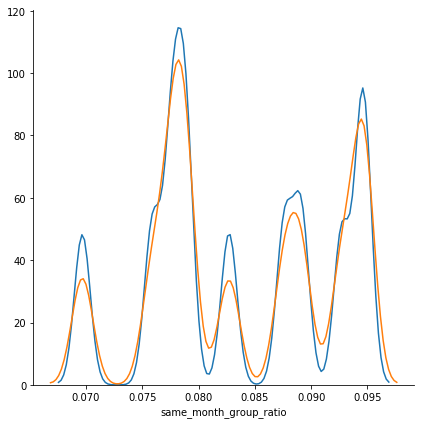

In [45]:
sns.FacetGrid(train_set, hue="deal_or_not", size=6) \
.map(sns.kdeplot, "same_month_group_ratio")

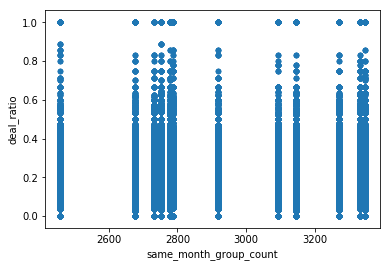

In [27]:
train_set.plot(kind="scatter", x="same_month_group_count", y="deal_ratio")

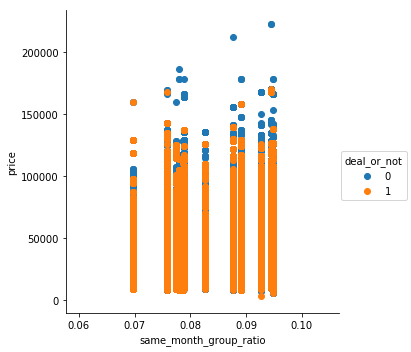

In [46]:
sns.FacetGrid(train_set, hue="deal_or_not", size=5) \
   .map(plt.scatter, "same_month_group_ratio", "price") \
   .add_legend()